# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from vanilla_dqn_agent import Agent
from double_QL_agent import Double_DQN_Agent

import gym
import random
import torch
from collections import deque

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline




ROUND0-----------------
Using vanilla network
Episode 100	Average Score: 0.20
Episode 200	Average Score: 0.90
Episode 300	Average Score: 1.93
Episode 400	Average Score: 2.45
Episode 500	Average Score: 3.00
Episode 600	Average Score: 3.07
Episode 700	Average Score: 3.90
Episode 750	Average Score: 4.29Save model in 750 episodes
Episode 800	Average Score: 4.36
ROUND1-----------------
Using vanilla network
Episode 100	Average Score: 0.04
Episode 200	Average Score: 0.13
Episode 300	Average Score: 1.20
Episode 400	Average Score: 2.10
Episode 500	Average Score: 2.73
Episode 600	Average Score: 3.11
Episode 700	Average Score: 3.80
Episode 750	Average Score: 3.85Save model in 750 episodes
Episode 800	Average Score: 3.94
ROUND2-----------------
Using vanilla network
Episode 100	Average Score: 0.23
Episode 200	Average Score: 0.79
Episode 300	Average Score: 1.90
Episode 400	Average Score: 2.15
Episode 500	Average Score: 3.38
Episode 600	Average Score: 3.77
Episode 700	Average Score: 3.72
Episode 75

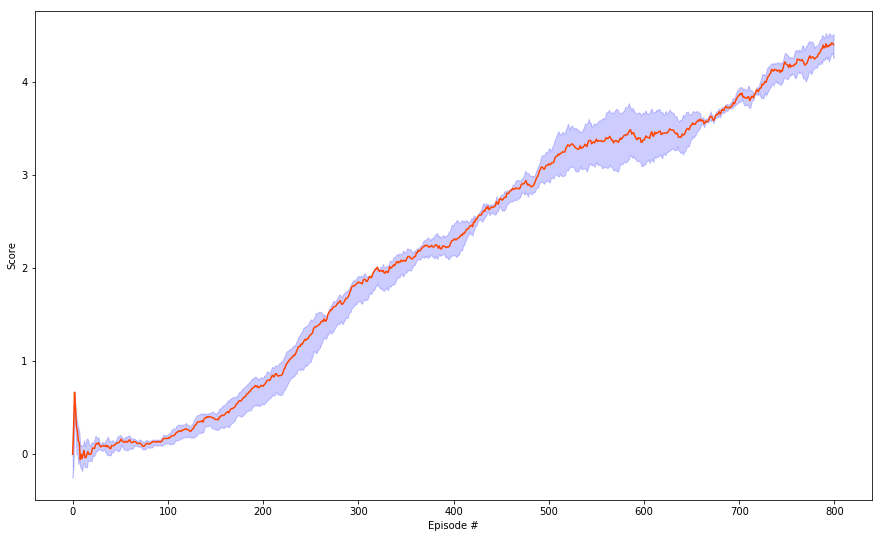

In [12]:
def vanilla_banana_dqn(n_episodes = 800, max_t = 100, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.995, random = 0 ):
    agent = Agent(state_size = 37, action_size = 4, seed = random)
    scores = [] #a list containing scores for all each episode.
    scores_window = deque(maxlen = 100)
    scores_mean = []
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        
        for t in range(max_t-1):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        scores_mean.append(np.mean(scores_window))

        eps = max(eps_end, eps * eps_decay)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if i_episode == 750:
            print('Save model in 750 episodes')
            torch.save(agent.qnetwork_local.state_dict(), 'vanilla_mid_checkpoint.pth')
    torch.save(agent.qnetwork_local.state_dict(), 'vanilla_checkpoint.pth')
    return scores, scores_mean

eight_init_list = []
for random_init in range(4):
    print('ROUND{}-----------------'.format(random_init))
    _,scores_mean = vanilla_banana_dqn(random = random_init*random_init)
    eight_init_list.append(scores_mean)
    
v_down , v_median, v_up = np.percentile(np.array(eight_init_list),[25,50,75], axis=0)


# vanilla_scores, vanilla_scores_mean, vanilla_scores_std = vanilla_banana_dqn()

figsize = 15,9
figure, ax = plt.subplots(figsize=figsize)


plt.plot(np.arange(len(v_median)), v_median, color='orangered' )

plt.fill_between(np.arange(len(v_median)),v_up,v_down,color='b',alpha = 0.2)

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('vanilla_dqn.png')
plt.show()

ROUND0-----------------
Using Dueling network
Episode 100	Average Score: 0.70
Episode 200	Average Score: 4.26
Episode 300	Average Score: 7.60
Episode 400	Average Score: 10.07
Episode 500	Average Score: 12.96
Episode 600	Average Score: 14.00
Episode 700	Average Score: 15.09
Episode 750	Average Score: 15.61Save model in 750 episodes
Episode 800	Average Score: 15.63
Episode 900	Average Score: 15.07
Episode 1000	Average Score: 16.13
Episode 1100	Average Score: 15.98
Episode 1200	Average Score: 16.20
Episode 1300	Average Score: 15.71
Episode 1400	Average Score: 16.68
Episode 1500	Average Score: 17.17
Episode 1600	Average Score: 15.73
ROUND1-----------------
Using Dueling network
Episode 100	Average Score: 1.12
Episode 200	Average Score: 4.60
Episode 300	Average Score: 8.10
Episode 400	Average Score: 10.78
Episode 500	Average Score: 12.91
Episode 600	Average Score: 14.15
Episode 700	Average Score: 15.36
Episode 750	Average Score: 16.26Save model in 750 episodes
Episode 800	Average Score: 15.

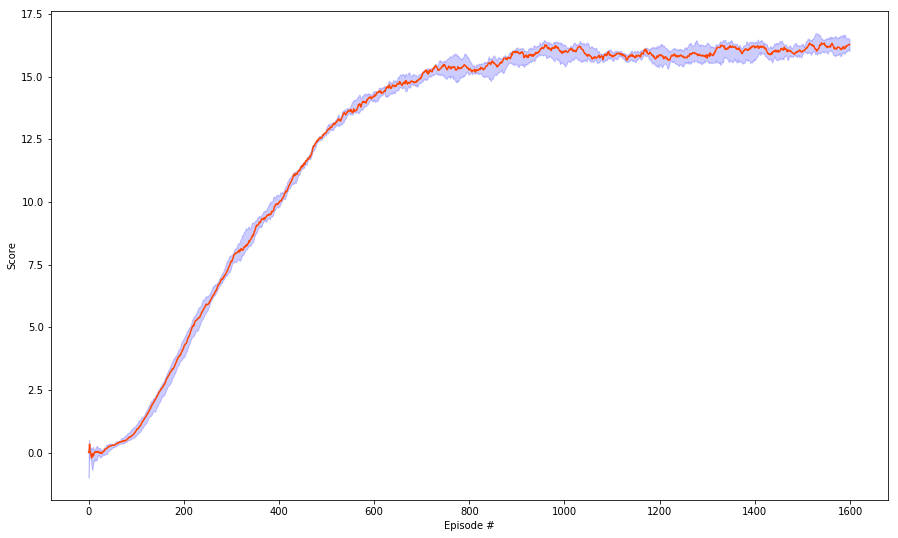

In [9]:
def dueling_banana_dqn(n_episodes = 1600, max_t = 300, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.995, random = 0):
    dueling_agent = Agent(state_size = 37, action_size = 4, seed = random, network_type = 'Dueling')
    scores = [] #a list containing scores for all each episode.
    scores_window = deque(maxlen = 100)
    scores_mean = []
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        
        for t in range(max_t-1):
            action = dueling_agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            dueling_agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        scores_mean.append(np.mean(scores_window))

        eps = max(eps_end, eps * eps_decay)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if i_episode == 750:
            print('Save model in 750 episodes')
            torch.save(dueling_agent.qnetwork_local.state_dict(), 'dueling_mid_checkpoint.pth')
    torch.save(dueling_agent.qnetwork_local.state_dict(), 'dueling_checkpoint.pth')
    return scores, scores_mean

eight_init_list = []
for random_init in range(8):
    print('ROUND{}-----------------'.format(random_init))
    _,scores_mean = dueling_banana_dqn(random = random_init*random_init)
    eight_init_list.append(scores_mean)
    
duel_down , duel_median, duel_up = np.percentile(np.array(eight_init_list),[25,50,75], axis=0)


figsize = 15,9
figure, ax = plt.subplots(figsize=figsize)


plt.plot(np.arange(len(duel_median)), duel_median, color='orangered' )

plt.fill_between(np.arange(len(duel_median)),duel_up,duel_down,color='b',alpha = 0.2)

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('dueling_dqn.png')
plt.show()

ROUND0-----------------
Using double network
Episode 100	Average Score: 1.35
Episode 200	Average Score: 5.29
Episode 300	Average Score: 8.20
Episode 400	Average Score: 11.17
Episode 500	Average Score: 13.51
Episode 600	Average Score: 14.38
Episode 700	Average Score: 15.32
Episode 750	Average Score: 15.30Save model in 750 episodes
Episode 800	Average Score: 15.87
Episode 900	Average Score: 16.13
Episode 1000	Average Score: 16.76
Episode 1100	Average Score: 16.16
Episode 1200	Average Score: 16.64
Episode 1300	Average Score: 16.94
Episode 1400	Average Score: 17.03
Episode 1500	Average Score: 16.08
Episode 1600	Average Score: 16.77
ROUND1-----------------
Using double network
Episode 100	Average Score: 0.26
Episode 200	Average Score: 3.18
Episode 300	Average Score: 6.95
Episode 400	Average Score: 10.79
Episode 500	Average Score: 13.68
Episode 600	Average Score: 14.08
Episode 700	Average Score: 15.47
Episode 750	Average Score: 15.80Save model in 750 episodes
Episode 800	Average Score: 15.98

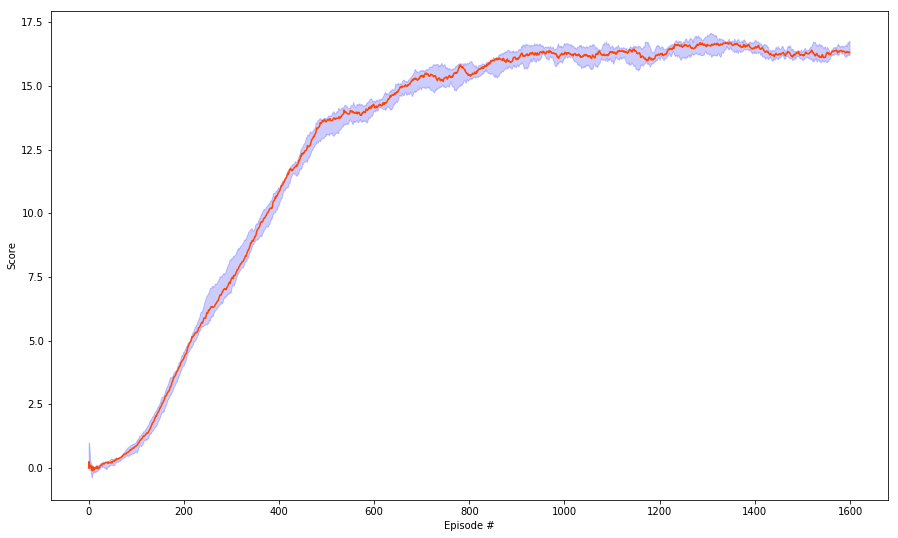

In [10]:
def double_banana_dqn(n_episodes = 1600, max_t = 300, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.995, random = 0):
    double_agent = Double_DQN_Agent(state_size = 37, action_size = 4, seed = random)

    scores = [] #a list containing scores for all each episode.
    scores_window = deque(maxlen = 100)
    scores_mean = []
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        
        for t in range(max_t-1):
            action = double_agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            double_agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        scores_mean.append(np.mean(scores_window))

        eps = max(eps_end, eps * eps_decay)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if i_episode == 750:
            print('Save model in 750 episodes')
            torch.save(double_agent.qnetwork_local.state_dict(), 'double_mid_checkpoint.pth')
    torch.save(double_agent.qnetwork_local.state_dict(), 'double_checkpoint.pth')
    return scores, scores_mean

eight_init_list = []
for random_init in range(8):
    print('ROUND{}-----------------'.format(random_init))
    _,scores_mean = double_banana_dqn(random = random_init*random_init)
    eight_init_list.append(scores_mean)
    
double_down , double_median, double_up = np.percentile(np.array(eight_init_list),[25,50,75], axis=0)


figsize = 15,9
figure, ax = plt.subplots(figsize=figsize)

plt.plot(np.arange(len(double_median)), double_median, color='orangered' )

plt.fill_between(np.arange(len(double_median)),double_up,double_down,color='b',alpha = 0.2)

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('double_dqn.png')
plt.show()

ROUND0-----------------
Using double Dueling network
Episode 100	Average Score: 0.50
Episode 200	Average Score: 3.49
Episode 300	Average Score: 6.78
Episode 400	Average Score: 9.57
Episode 500	Average Score: 13.32
Episode 600	Average Score: 14.55
Episode 700	Average Score: 14.41
Episode 750	Average Score: 14.96Save model in 750 episodes
Episode 800	Average Score: 15.90
Episode 900	Average Score: 16.29
Episode 1000	Average Score: 16.29
Episode 1100	Average Score: 16.40
Episode 1200	Average Score: 16.20
Episode 1300	Average Score: 16.04
Episode 1400	Average Score: 17.11
Episode 1500	Average Score: 16.67
Episode 1600	Average Score: 16.65
ROUND1-----------------
Using double Dueling network
Episode 100	Average Score: 0.84
Episode 200	Average Score: 5.07
Episode 300	Average Score: 8.31
Episode 400	Average Score: 10.58
Episode 500	Average Score: 13.06
Episode 600	Average Score: 14.47
Episode 700	Average Score: 15.42
Episode 750	Average Score: 15.64Save model in 750 episodes
Episode 800	Avera

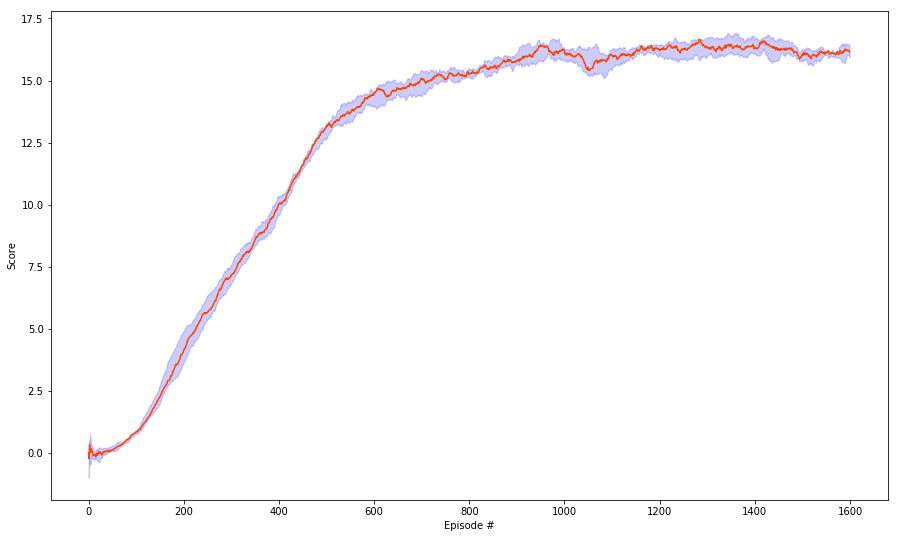

In [11]:
def double_dueling_banana_dqn(n_episodes = 1600, max_t = 300, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.995, random = 0):
    dueling_double_agent = Double_DQN_Agent(state_size = 37, action_size = 4, seed = random, network_type = 'Dueling')
    scores = [] #a list containing scores for all each episode.
    scores_window = deque(maxlen = 100)
    scores_mean = []
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        
        for t in range(max_t-1):
            action = dueling_double_agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            dueling_double_agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        scores_mean.append(np.mean(scores_window))

        eps = max(eps_end, eps * eps_decay)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if i_episode == 750:
            print('Save model in 750 episodes')
            torch.save(dueling_double_agent.qnetwork_local.state_dict(), 'double_dueling_mid_checkpoint.pth')
    torch.save(dueling_double_agent.qnetwork_local.state_dict(), 'double_dueling_checkpoint.pth')
    return scores, scores_mean


eight_init_list = []
for random_init in range(8):
    print('ROUND{}-----------------'.format(random_init))
    _,scores_mean = double_dueling_banana_dqn(random = random_init*random_init)
    eight_init_list.append(scores_mean)
    
dd_down , dd_median, dd_up = np.percentile(np.array(eight_init_list),[25,50,75], axis=0)


figsize = 15,9
figure, ax = plt.subplots(figsize=figsize)

plt.plot(np.arange(len(dd_median)), dd_median, color='orangered' )

plt.fill_between(np.arange(len(dd_median)),dd_up,dd_down,color='b',alpha = 0.2)

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('double_dqn.png')
plt.show()

/home/bourne/anaconda3/envs/drlnd/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


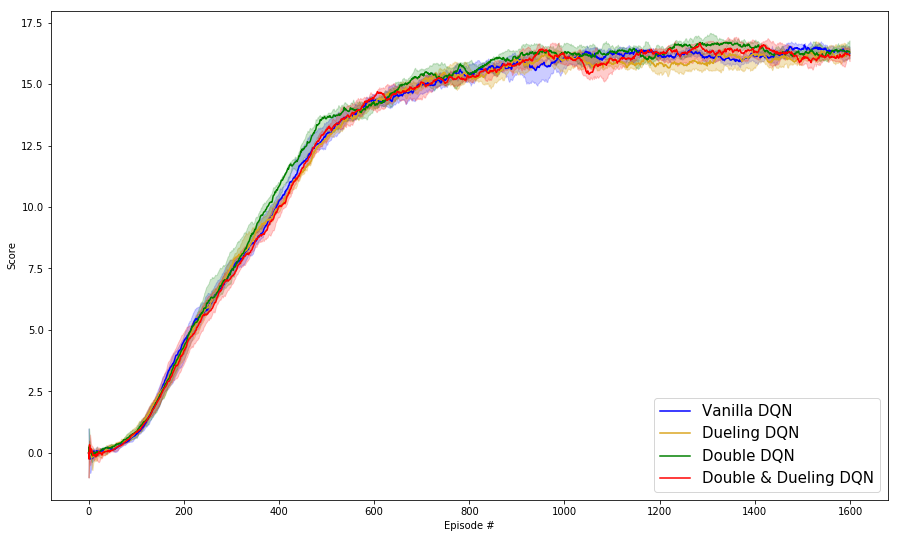

In [12]:
# Plot all the data 
# fig = plt.figure()
# ax = fig.add_subplot(111)
figsize = 15,9
figure, ax = plt.subplots(figsize=figsize)
 
vanilla_curves = plt.plot(np.arange(len(v_median)), np.array(v_median), color='b',label='Vanilla DQN' )
plt.fill_between(np.arange(len(v_median)),v_up,v_down,color='b',alpha = 0.2)

duel_curves = plt.plot(np.arange(len(duel_median)), np.array(duel_median), color='goldenrod',label='Dueling DQN' )
plt.fill_between(np.arange(len(duel_median)),duel_up,duel_down,color='goldenrod',alpha = 0.3)

double_curves = plt.plot(np.arange(len(double_median)), np.array(double_median), color='g',label='Double DQN' )
plt.fill_between(np.arange(len(double_median)),double_up,double_down,color='g',alpha = 0.2)

dd_curves = plt.plot(np.arange(len(dd_median)), dd_median, color='red',label='Double & Dueling DQN' )
plt.fill_between(np.arange(len(dd_median)),dd_up,dd_down,color='red',alpha = 0.2)


plt.ylabel('Score')
plt.xlabel('Episode #')


font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}

plt.legend(prop=font1, loc = 4)

plt.savefig('all_the_data.png')

plt.show()

In [13]:
# env.close()

In [10]:
# load train model to act
agent = Agent(state_size = 37, action_size = 4, seed = 0)
agent.qnetwork_local.load_state_dict(torch.load('vanilla_checkpoint.pth', map_location='cpu'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    if done:                                       # exit loop if episode finished
        print('total score:', score)
        break
                 


Using vanilla network
total score: 19.0


In [24]:
# env.close()

In [11]:
#random act
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


In [ ]:
env.close()